# Water Potability Prediction System using Machine Learning

---

## Project Information

| Item | Details |
|------|--------|
| **Author** | Sohaib Farooq |
| **Email** | sohaib.farooq@bigacademy.com |
| **Domain** | Environmental Science / Public Health |
| **Dataset** | Water Potability Dataset (Kaggle) |
| **Algorithms** | Logistic Regression, Random Forest, XGBoost, LightGBM |

---

## Problem Statement

Access to safe drinking water is essential for health and is a basic human right. This project aims to **predict whether water is safe for human consumption** based on various water quality parameters using machine learning algorithms.

---

## Dataset Download

**Download Link:** [Kaggle - Water Potability Dataset](https://www.kaggle.com/datasets/adityakadiwal/water-potability)

After downloading, place `water_potability.csv` in the same folder as this notebook.

---
## Step 1 & 2: Import Required Libraries
---

In [43]:
# Install required packages (run this cell first time only)
# !pip install pandas numpy matplotlib seaborn scikit-learn

In [44]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             classification_report, precision_score, 
                             recall_score, f1_score)

# Settings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

print("All libraries imported successfully!")

All libraries imported successfully!


---
## Step 3: Domain and Problem Statement
---

### Domain: Environmental Science / Public Health

### Problem Statement:
To predict whether water is safe for human consumption based on various water quality parameters using machine learning algorithms.

### Features Description:

| Feature | Description | Unit |
|---------|-------------|------|
| pH | Acidity/Alkalinity level | 0-14 |
| Hardness | Capacity to precipitate soap | mg/L |
| Solids | Total dissolved solids | ppm |
| Chloramines | Amount of chloramines | ppm |
| Sulfate | Sulfate dissolved | mg/L |
| Conductivity | Electrical conductivity | μS/cm |
| Organic_carbon | Organic carbon amount | ppm |
| Trihalomethanes | THMs amount | μg/L |
| Turbidity | Cloudiness measure | NTU |
| **Potability** | **Target: Safe (1) or Unsafe (0)** | - |

---
## Step 4: Data Collection and Preprocessing
---

### 4.1 Load the Dataset

In [45]:
# Load the dataset
df = pd.read_csv('water_potability.csv')

# Display basic info
print("="*60)
print("DATASET LOADED SUCCESSFULLY!")
print("="*60)
print(f"\nDataset Shape: {df.shape}")
print(f"Total Samples: {df.shape[0]}")
print(f"Total Features: {df.shape[1]}")

DATASET LOADED SUCCESSFULLY!

Dataset Shape: (3276, 10)
Total Samples: 3276
Total Features: 10


### 4.2 Explore the Dataset

In [46]:
# Display first 5 rows
print("First 5 Rows of Dataset:")
df.head()

First 5 Rows of Dataset:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [47]:
# Display last 5 rows
print("Last 5 Rows of Dataset:")
df.tail()

Last 5 Rows of Dataset:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [48]:
# Dataset Information
print("Dataset Information:")
print("="*60)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [49]:
# Statistical Summary
print("Statistical Summary:")
df.describe()

Statistical Summary:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [50]:
# Check column names
print("Column Names:")
print(df.columns.tolist())

Column Names:
['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']


### 4.3 Check for Missing Values

In [51]:
# Check missing values
print("Missing Values in Each Column:")
print("="*60)
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage (%)': missing_percent
})
print(missing_df)
print(f"\nTotal Missing Values: {df.isnull().sum().sum()}")

Missing Values in Each Column:
                 Missing Count  Percentage (%)
ph                         491           14.99
Hardness                     0            0.00
Solids                       0            0.00
Chloramines                  0            0.00
Sulfate                    781           23.84
Conductivity                 0            0.00
Organic_carbon               0            0.00
Trihalomethanes            162            4.95
Turbidity                    0            0.00
Potability                   0            0.00

Total Missing Values: 1434


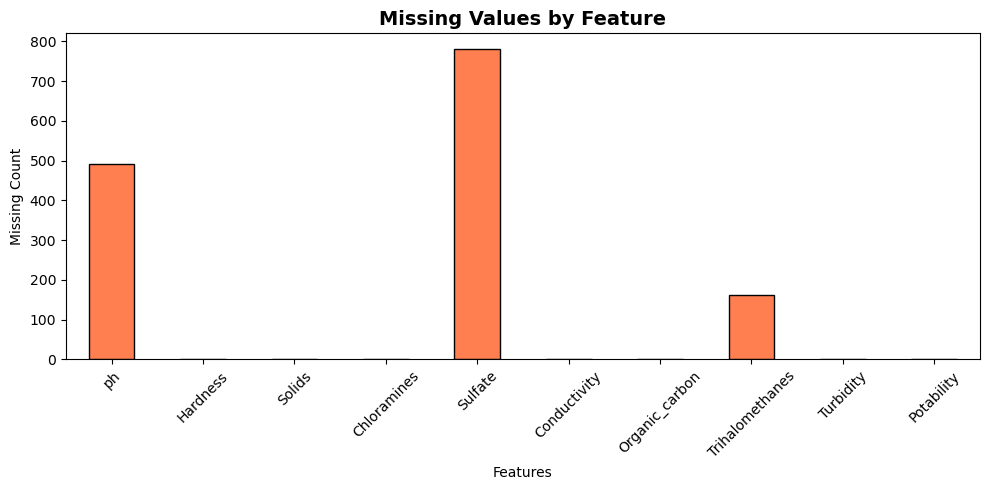

In [52]:
# Visualize missing values
plt.figure(figsize=(10, 5))
missing_values.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Missing Values by Feature', fontsize=14, fontweight='bold')
plt.xlabel('Features')
plt.ylabel('Missing Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4.4 Handle Missing Values

In [53]:
# Fill missing values with median (robust to outliers)
print("Handling Missing Values (Filling with Median)...")
print("="*60)

for column in df.columns:
    if df[column].isnull().sum() > 0:
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)
        print(f"{column}: Filled with median = {median_value:.2f}")

print("\n" + "="*60)
print("Missing Values After Treatment:")
print(df.isnull().sum())

Handling Missing Values (Filling with Median)...
ph: Filled with median = 7.04
Sulfate: Filled with median = 333.07
Trihalomethanes: Filled with median = 66.62

Missing Values After Treatment:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


### 4.5 Explore Target Variable

In [54]:
# Target variable distribution
print("Target Variable Distribution:")
print("="*60)
print(df['Potability'].value_counts())
print(f"\nClass 0 (Not Potable): {(df['Potability'] == 0).sum()} samples")
print(f"Class 1 (Potable): {(df['Potability'] == 1).sum()} samples")

Target Variable Distribution:
Potability
0    1998
1    1278
Name: count, dtype: int64

Class 0 (Not Potable): 1998 samples
Class 1 (Potable): 1278 samples


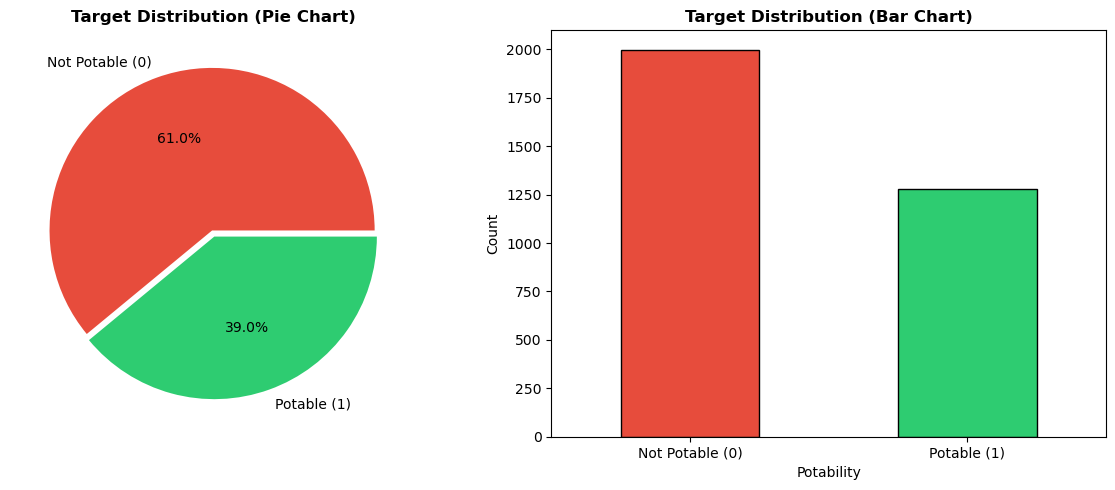

In [55]:
# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Pie Chart
colors = ['#e74c3c', '#2ecc71']
labels = ['Not Potable (0)', 'Potable (1)']
df['Potability'].value_counts().plot(kind='pie', ax=axes[0], colors=colors, 
                                      autopct='%1.1f%%', labels=labels,
                                      explode=(0.02, 0.02))
axes[0].set_title('Target Distribution (Pie Chart)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('')

# Bar Chart
df['Potability'].value_counts().plot(kind='bar', ax=axes[1], color=colors, edgecolor='black')
axes[1].set_title('Target Distribution (Bar Chart)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Potability')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(labels, rotation=0)

plt.tight_layout()
plt.show()

### 4.6 Data Visualization

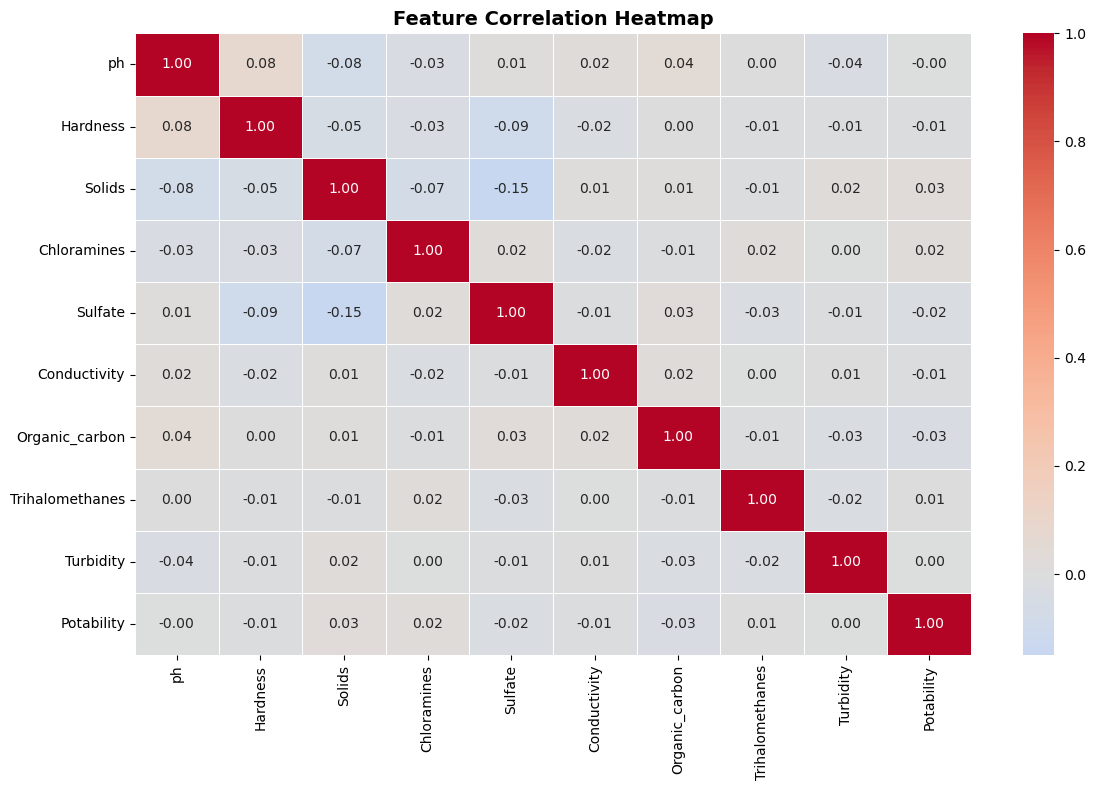

In [56]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

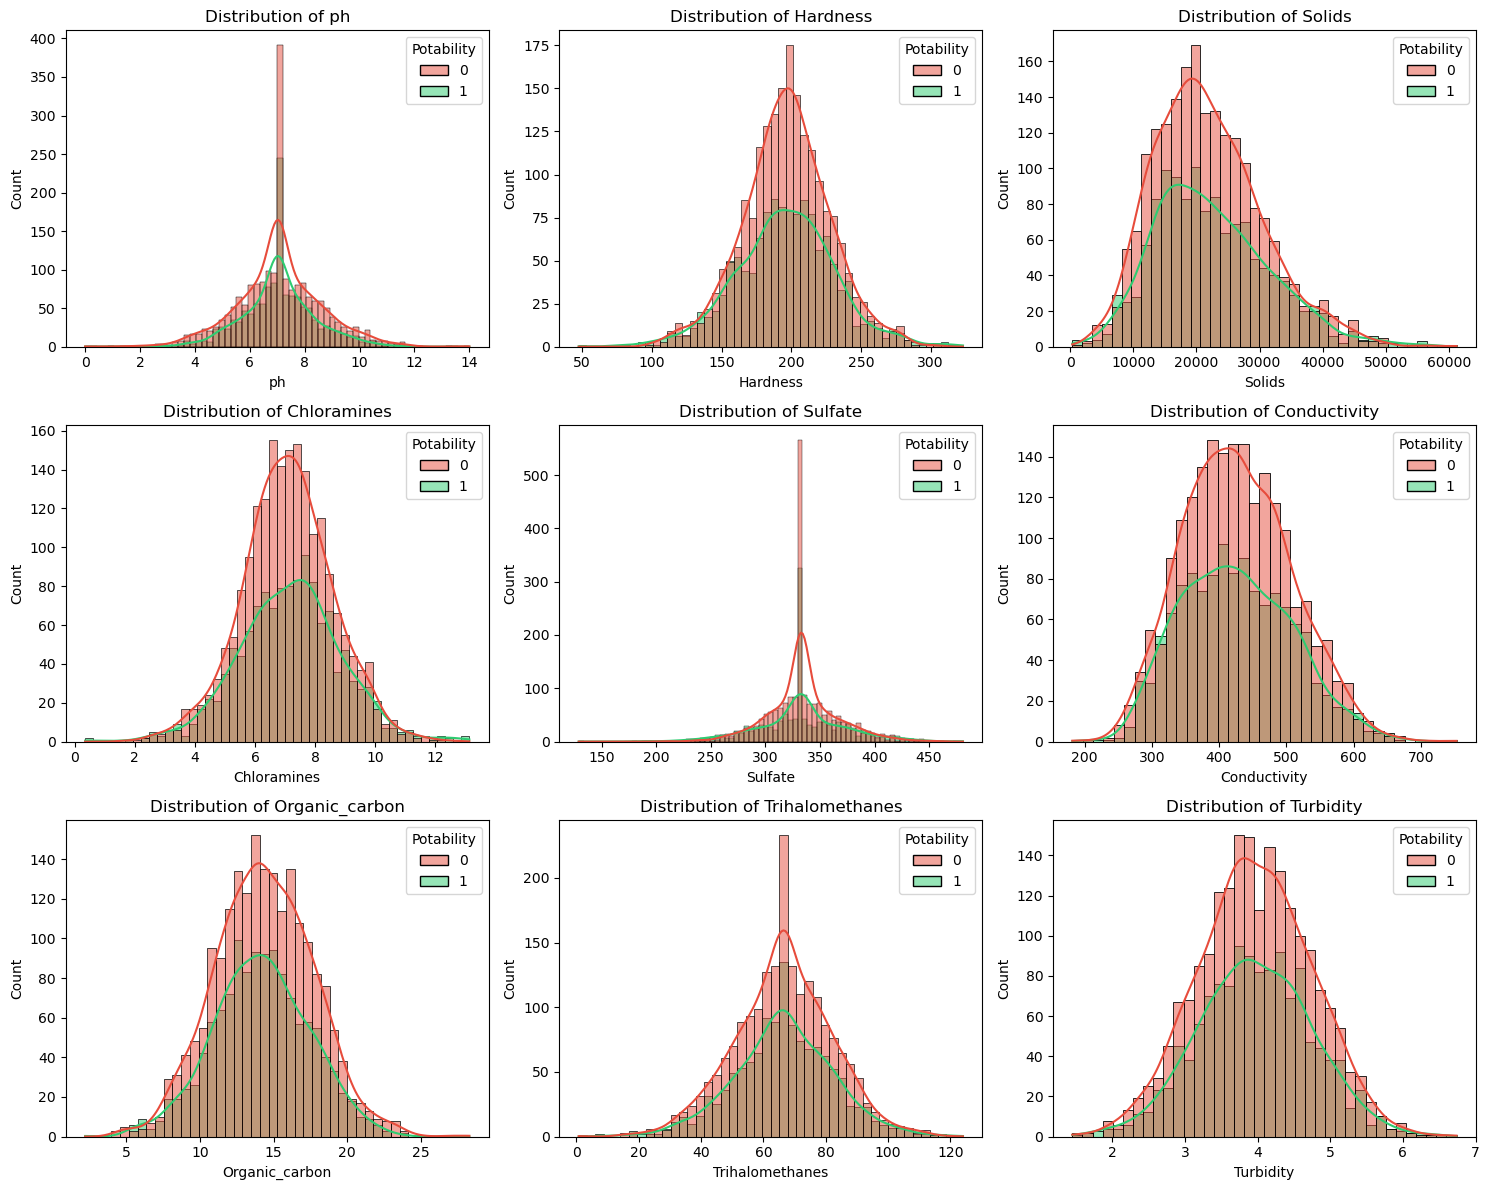

In [57]:
# Distribution of all features
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
features = df.columns[:-1]  # All columns except Potability

for idx, feature in enumerate(features):
    row = idx // 3
    col = idx % 3
    
    sns.histplot(data=df, x=feature, hue='Potability', kde=True, 
                 ax=axes[row, col], palette=['#e74c3c', '#2ecc71'])
    axes[row, col].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

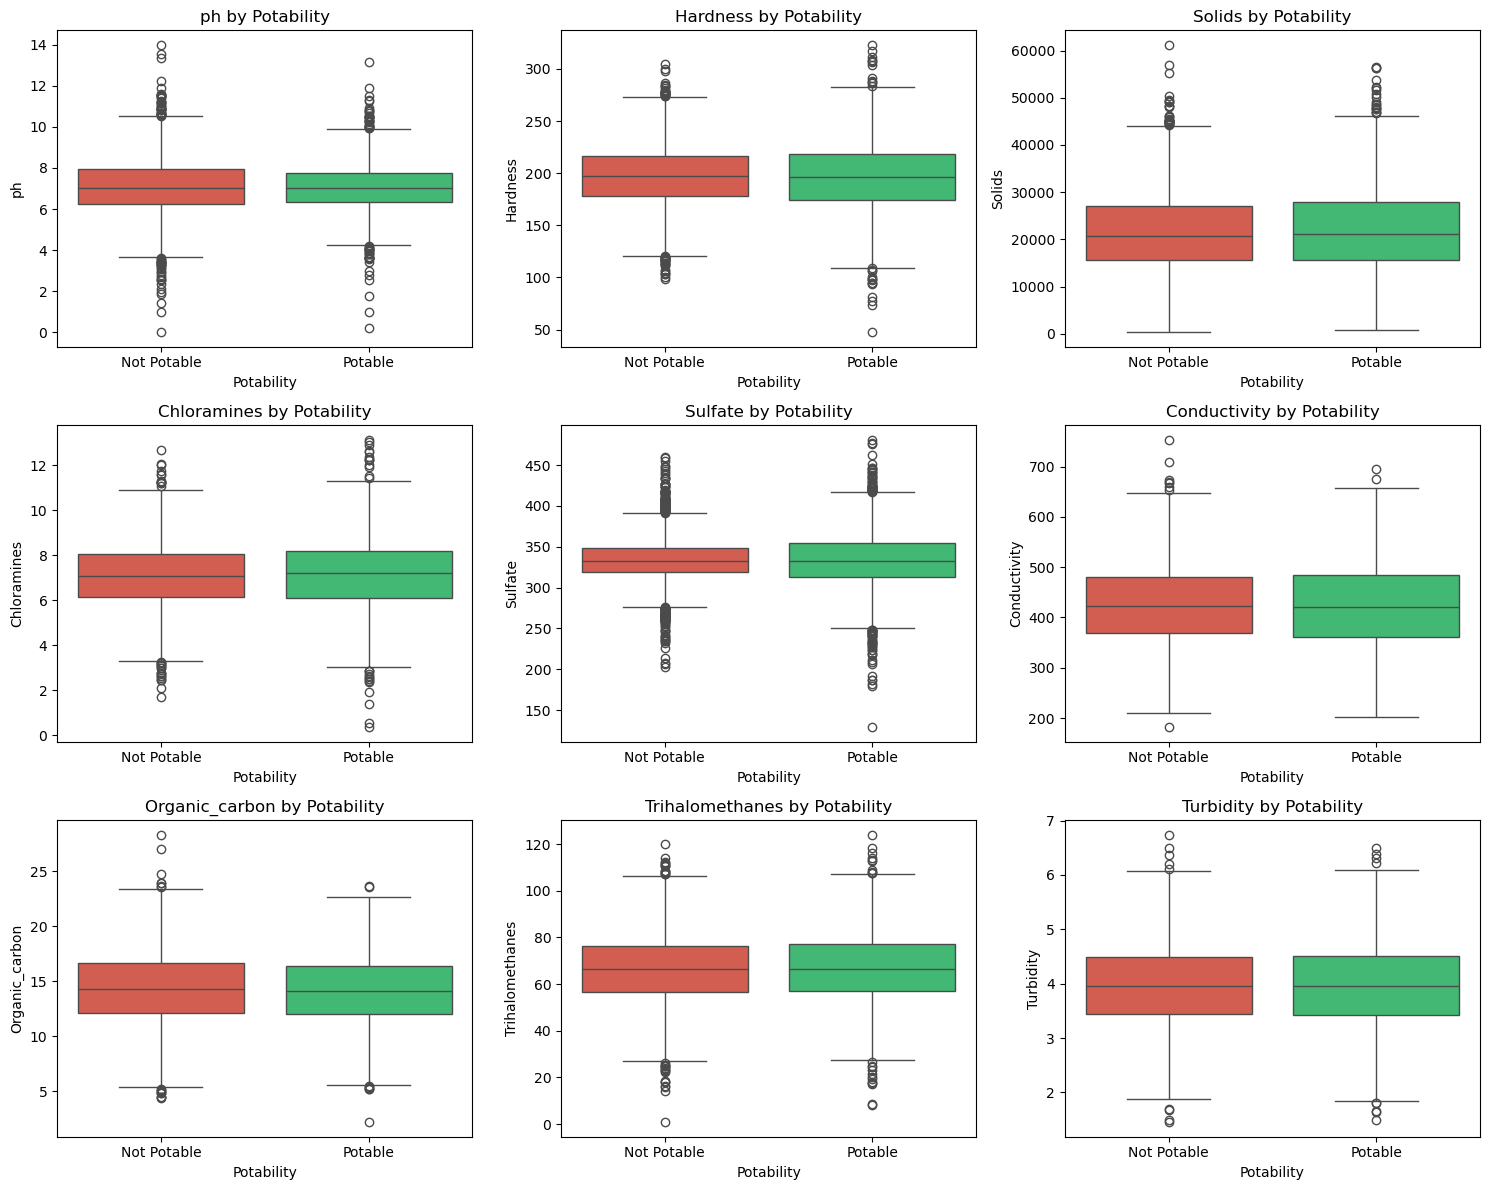

In [58]:
# Box plots for all features
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
features = df.columns[:-1]

for idx, feature in enumerate(features):
    row = idx // 3
    col = idx % 3
    
    sns.boxplot(data=df, x='Potability', y=feature, ax=axes[row, col],
                palette=['#e74c3c', '#2ecc71'])
    axes[row, col].set_title(f'{feature} by Potability')
    axes[row, col].set_xticklabels(['Not Potable', 'Potable'])

plt.tight_layout()
plt.show()

### 4.7 Prepare Data for Machine Learning

In [59]:
# Separate features (X) and target (y)
print("Separating Features and Target Variable...")
print("="*60)

X = df.drop('Potability', axis=1)
y = df['Potability']

print(f"Features (X) Shape: {X.shape}")
print(f"Target (y) Shape: {y.shape}")
print(f"\nFeature Names: {list(X.columns)}")

Separating Features and Target Variable...
Features (X) Shape: (3276, 9)
Target (y) Shape: (3276,)

Feature Names: ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']


In [60]:
# Split data into training and testing sets (80% train, 20% test)
print("Splitting Data into Training and Testing Sets...")
print("="*60)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training Set: {X_train.shape[0]} samples ({80}%)")
print(f"Testing Set: {X_test.shape[0]} samples ({20}%)")

Splitting Data into Training and Testing Sets...
Training Set: 2620 samples (80%)
Testing Set: 656 samples (20%)


In [61]:
# Feature Scaling using StandardScaler
print("Feature Scaling (StandardScaler)...")
print("="*60)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed successfully!")
print(f"\nScaled Training Data Shape: {X_train_scaled.shape}")
print(f"Scaled Testing Data Shape: {X_test_scaled.shape}")

Feature Scaling (StandardScaler)...
Feature scaling completed successfully!

Scaled Training Data Shape: (2620, 9)
Scaled Testing Data Shape: (656, 9)


---
## Step 5: Apply ML Algorithms (4 Algorithms)
---

In [62]:
# Dictionary to store all results
results = {}

### Algorithm 1: Logistic Regression

In [63]:
print("="*60)
print("ALGORITHM 1: LOGISTIC REGRESSION")
print("="*60)

# Create and train the model with class_weight='balanced' to handle class imbalance
lr_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
lr_model.fit(X_train_scaled, y_train)

# Make predictions
lr_pred = lr_model.predict(X_test_scaled)

# Calculate metrics
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

# Store results
results['Logistic Regression'] = {
    'Accuracy': lr_accuracy,
    'Precision': lr_precision,
    'Recall': lr_recall,
    'F1-Score': lr_f1,
    'Predictions': lr_pred
}

# Print results
print(f"\nResults:")
print(f"   Accuracy:  {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)")
print(f"   Precision: {lr_precision:.4f}")
print(f"   Recall:    {lr_recall:.4f}")
print(f"   F1-Score:  {lr_f1:.4f}")

ALGORITHM 1: LOGISTIC REGRESSION

Results:
   Accuracy:  0.5259 (52.59%)
   Precision: 0.4159
   Recall:    0.5312
   F1-Score:  0.4666


### Algorithm 2: Random Forest Classifier

In [64]:
print("="*60)
print("ALGORITHM 2: RANDOM FOREST CLASSIFIER")
print("="*60)

# Create and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test_scaled)

# Calculate metrics
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

# Store results
results['Random Forest'] = {
    'Accuracy': rf_accuracy,
    'Precision': rf_precision,
    'Recall': rf_recall,
    'F1-Score': rf_f1,
    'Predictions': rf_pred
}

# Print results
print(f"\nResults:")
print(f"   Accuracy:  {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)")
print(f"   Precision: {rf_precision:.4f}")
print(f"   Recall:    {rf_recall:.4f}")
print(f"   F1-Score:  {rf_f1:.4f}")

ALGORITHM 2: RANDOM FOREST CLASSIFIER

Results:
   Accuracy:  0.6585 (65.85%)
   Precision: 0.6311
   Recall:    0.3008
   F1-Score:  0.4074



Feature Importance (Random Forest):
        Feature  Importance
             ph    0.129132
        Sulfate    0.127858
       Hardness    0.121633
    Chloramines    0.116048
         Solids    0.111863
   Conductivity    0.100752
      Turbidity    0.099522
 Organic_carbon    0.097521
Trihalomethanes    0.095672


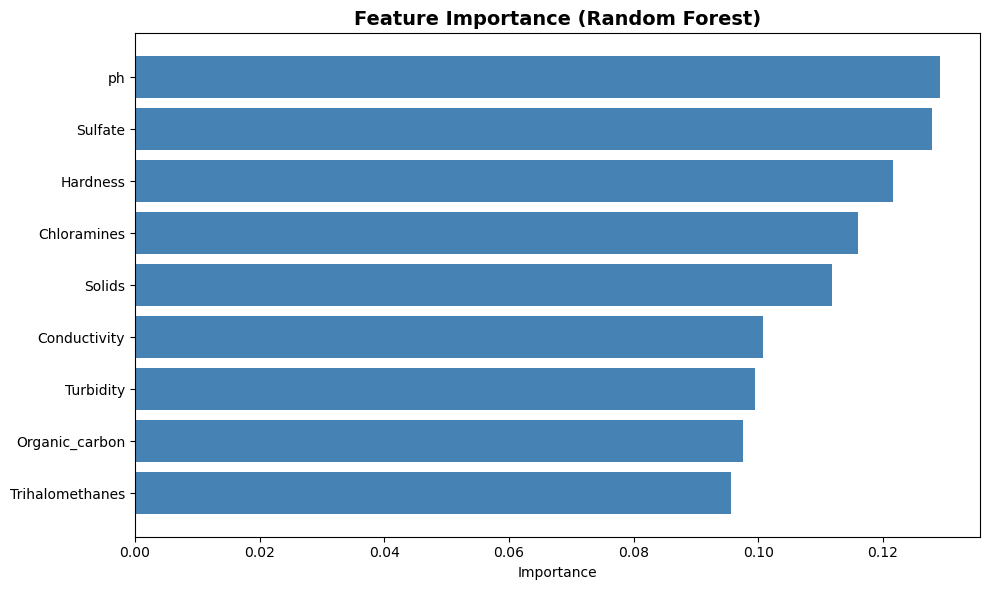

In [65]:
# Feature Importance from Random Forest
print("\nFeature Importance (Random Forest):")
print("="*60)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.to_string(index=False))

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='steelblue')
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Algorithm 3: XGBoost Classifier

In [66]:
print("="*60)
print("ALGORITHM 3: XGBOOST CLASSIFIER")
print("="*60)

# Create and train the model
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
xgb_pred = xgb_model.predict(X_test_scaled)

# Calculate metrics
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)

# Store results
results['XGBoost'] = {
    'Accuracy': xgb_accuracy,
    'Precision': xgb_precision,
    'Recall': xgb_recall,
    'F1-Score': xgb_f1,
    'Predictions': xgb_pred
}

# Print results
print(f"\nResults:")
print(f"   Accuracy:  {xgb_accuracy:.4f} ({xgb_accuracy*100:.2f}%)")
print(f"   Precision: {xgb_precision:.4f}")
print(f"   Recall:    {xgb_recall:.4f}")
print(f"   F1-Score:  {xgb_f1:.4f}")

ALGORITHM 3: XGBOOST CLASSIFIER

Results:
   Accuracy:  0.6372 (63.72%)
   Precision: 0.5536
   Recall:    0.3633
   F1-Score:  0.4387


### Algorithm 4: LightGBM Classifier

In [67]:
print("="*60)
print("ALGORITHM 4: LIGHTGBM CLASSIFIER")
print("="*60)

# Create and train the model
lgbm_model = LGBMClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42, verbose=-1)
lgbm_model.fit(X_train_scaled, y_train)

# Make predictions
lgbm_pred = lgbm_model.predict(X_test_scaled)

# Calculate metrics
lgbm_accuracy = accuracy_score(y_test, lgbm_pred)
lgbm_precision = precision_score(y_test, lgbm_pred)
lgbm_recall = recall_score(y_test, lgbm_pred)
lgbm_f1 = f1_score(y_test, lgbm_pred)

# Store results
results['LightGBM'] = {
    'Accuracy': lgbm_accuracy,
    'Precision': lgbm_precision,
    'Recall': lgbm_recall,
    'F1-Score': lgbm_f1,
    'Predictions': lgbm_pred
}

# Print results
print(f"\nResults:")
print(f"   Accuracy:  {lgbm_accuracy:.4f} ({lgbm_accuracy*100:.2f}%)")
print(f"   Precision: {lgbm_precision:.4f}")
print(f"   Recall:    {lgbm_recall:.4f}")
print(f"   F1-Score:  {lgbm_f1:.4f}")

ALGORITHM 4: LIGHTGBM CLASSIFIER

Results:
   Accuracy:  0.6463 (64.63%)
   Precision: 0.5750
   Recall:    0.3594
   F1-Score:  0.4423


---
## Step 6: Model Evaluation
---

### 6.1 Model Comparison Summary

In [68]:
# Create comparison table
print("="*70)
print("MODEL COMPARISON SUMMARY")
print("="*70)

algorithms = ['Logistic Regression', 'Random Forest', 'XGBoost', 'LightGBM']

comparison_df = pd.DataFrame({
    'Algorithm': algorithms,
    'Accuracy': [results[algo]['Accuracy'] for algo in algorithms],
    'Precision': [results[algo]['Precision'] for algo in algorithms],
    'Recall': [results[algo]['Recall'] for algo in algorithms],
    'F1-Score': [results[algo]['F1-Score'] for algo in algorithms]
})

# Format as percentages
comparison_df_display = comparison_df.copy()
for col in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    comparison_df_display[col] = comparison_df_display[col].apply(lambda x: f"{x:.4f}")

print(comparison_df_display.to_string(index=False))

# Find best model
best_model_name = comparison_df.loc[comparison_df['Accuracy'].idxmax(), 'Algorithm']
best_accuracy = comparison_df['Accuracy'].max()

print("\n" + "="*70)
print(f"BEST MODEL: {best_model_name}")
print(f"BEST ACCURACY: {best_accuracy*100:.2f}%")
print("="*70)

MODEL COMPARISON SUMMARY
          Algorithm Accuracy Precision Recall F1-Score
Logistic Regression   0.5259    0.4159 0.5312   0.4666
      Random Forest   0.6585    0.6311 0.3008   0.4074
            XGBoost   0.6372    0.5536 0.3633   0.4387
           LightGBM   0.6463    0.5750 0.3594   0.4423

BEST MODEL: Random Forest
BEST ACCURACY: 65.85%


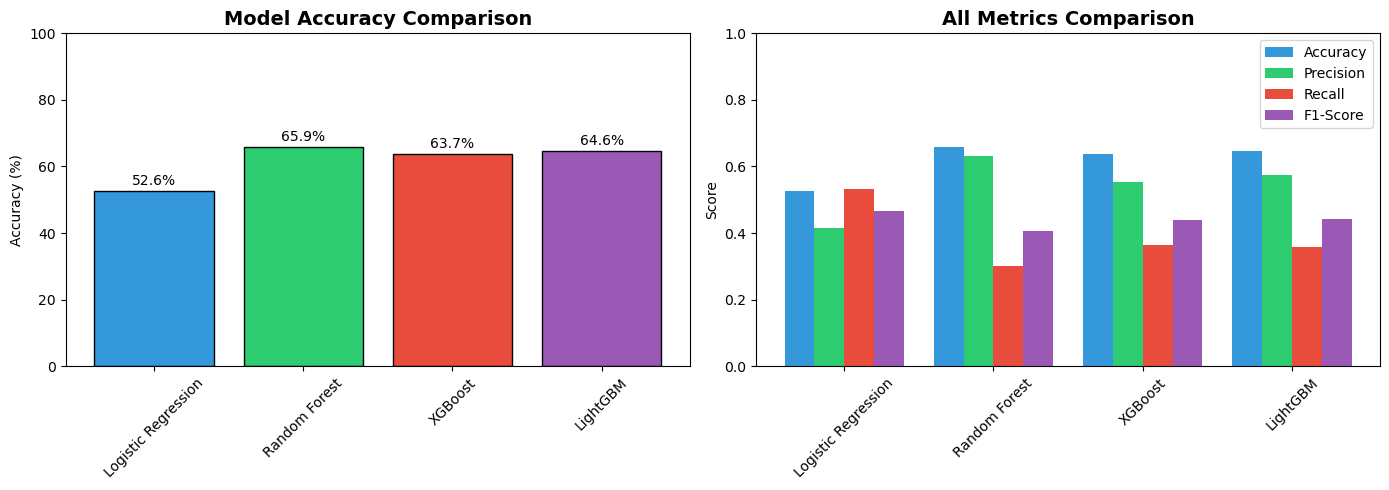

In [69]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy comparison bar chart
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6']
bars = axes[0].bar(algorithms, comparison_df['Accuracy'] * 100, color=colors, edgecolor='black')
axes[0].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Accuracy (%)')
axes[0].set_ylim(0, 100)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 1,
                 f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

axes[0].tick_params(axis='x', rotation=45)

# All metrics comparison
x = np.arange(len(algorithms))
width = 0.2

axes[1].bar(x - 1.5*width, comparison_df['Accuracy'], width, label='Accuracy', color='#3498db')
axes[1].bar(x - 0.5*width, comparison_df['Precision'], width, label='Precision', color='#2ecc71')
axes[1].bar(x + 0.5*width, comparison_df['Recall'], width, label='Recall', color='#e74c3c')
axes[1].bar(x + 1.5*width, comparison_df['F1-Score'], width, label='F1-Score', color='#9b59b6')

axes[1].set_title('All Metrics Comparison', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Score')
axes[1].set_xticks(x)
axes[1].set_xticklabels(algorithms, rotation=45)
axes[1].legend()
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

### 6.2 Confusion Matrices

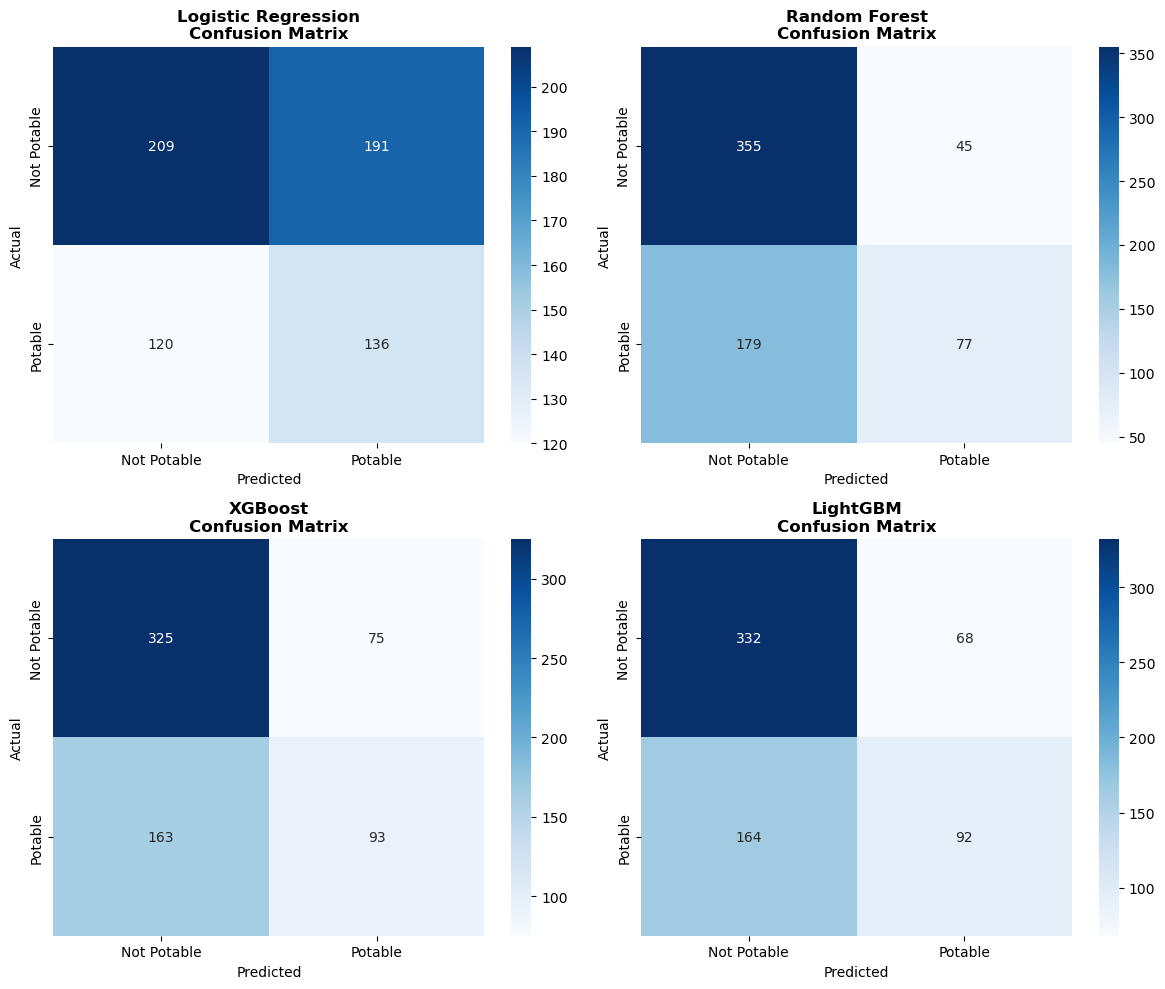

In [70]:
# Plot confusion matrices for all models
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

predictions = [lr_pred, rf_pred, xgb_pred, lgbm_pred]

for idx, (algo, pred) in enumerate(zip(algorithms, predictions)):
    row = idx // 2
    col = idx % 2
    
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[row, col],
                xticklabels=['Not Potable', 'Potable'],
                yticklabels=['Not Potable', 'Potable'])
    axes[row, col].set_title(f'{algo}\nConfusion Matrix', fontsize=12, fontweight='bold')
    axes[row, col].set_xlabel('Predicted')
    axes[row, col].set_ylabel('Actual')

plt.tight_layout()
plt.show()

### 6.3 ROC Curves and AUC Scores

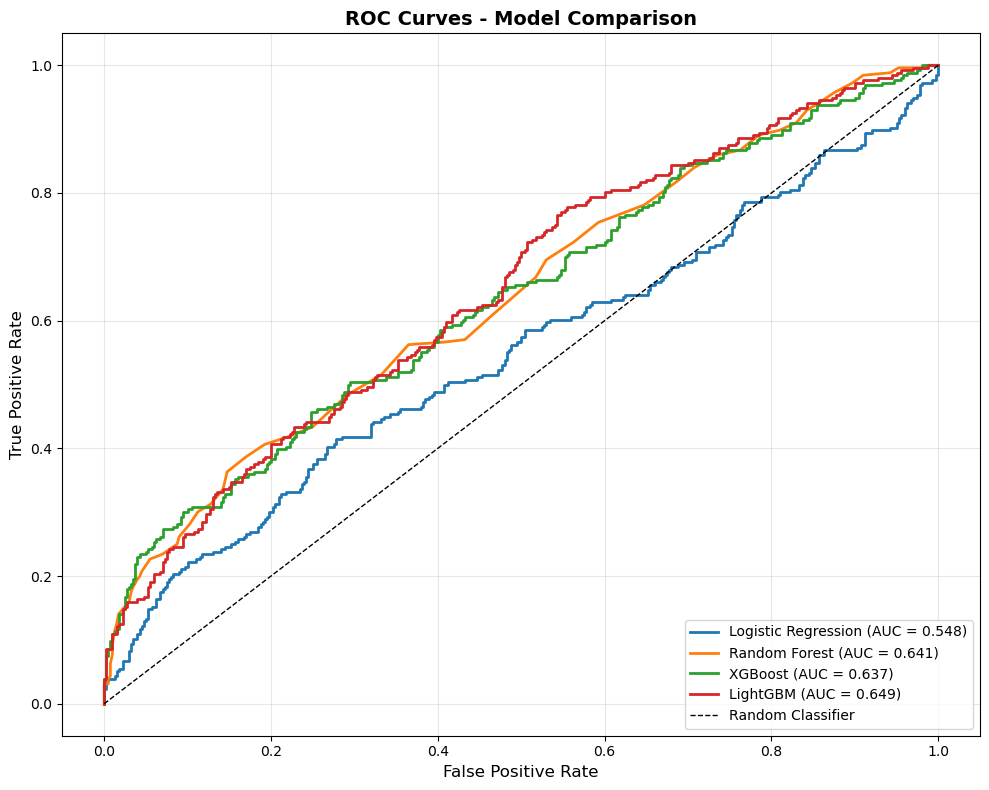


AUC Scores:
   Logistic Regression: 0.5475
   Random Forest:       0.6407
   XGBoost:             0.6367
   LightGBM:            0.6487


In [71]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Get prediction probabilities for ROC curves
# For models that support predict_proba
lr_proba = lr_model.predict_proba(X_test_scaled)[:, 1]
rf_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
xgb_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]
lgbm_proba = lgbm_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_proba)
lgbm_fpr, lgbm_tpr, _ = roc_curve(y_test, lgbm_proba)

# Calculate AUC scores
lr_auc = auc(lr_fpr, lr_tpr)
rf_auc = auc(rf_fpr, rf_tpr)
xgb_auc = auc(xgb_fpr, xgb_tpr)
lgbm_auc = auc(lgbm_fpr, lgbm_tpr)

# Plot ROC curves
plt.figure(figsize=(10, 8))

plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.3f})', linewidth=2)
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.3f})', linewidth=2)
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.3f})', linewidth=2)
plt.plot(lgbm_fpr, lgbm_tpr, label=f'LightGBM (AUC = {lgbm_auc:.3f})', linewidth=2)

# Diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Model Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print AUC scores
print("\nAUC Scores:")
print("="*50)
print(f"   Logistic Regression: {lr_auc:.4f}")
print(f"   Random Forest:       {rf_auc:.4f}")
print(f"   XGBoost:             {xgb_auc:.4f}")
print(f"   LightGBM:            {lgbm_auc:.4f}")

### 6.4 Precision-Recall Curves

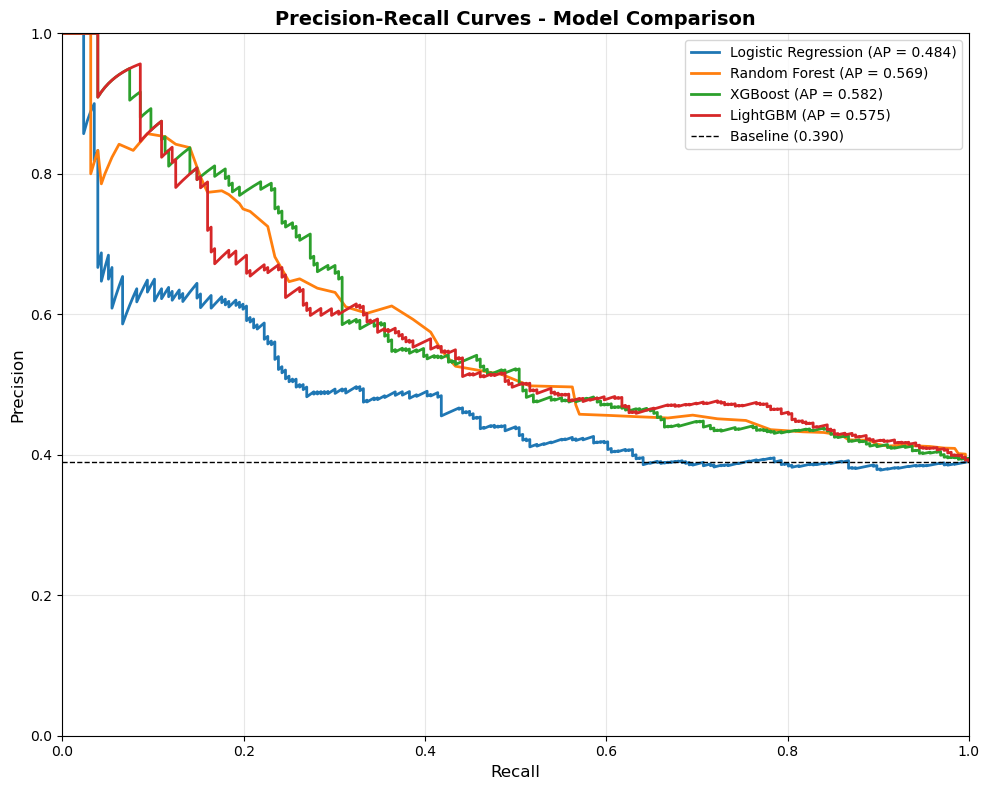


Average Precision Scores:
   Logistic Regression: 0.4841
   Random Forest:       0.5695
   XGBoost:             0.5816
   LightGBM:            0.5747


In [72]:
# Calculate Precision-Recall curves
lr_precision_curve, lr_recall_curve, _ = precision_recall_curve(y_test, lr_proba)
rf_precision_curve, rf_recall_curve, _ = precision_recall_curve(y_test, rf_proba)
xgb_precision_curve, xgb_recall_curve, _ = precision_recall_curve(y_test, xgb_proba)
lgbm_precision_curve, lgbm_recall_curve, _ = precision_recall_curve(y_test, lgbm_proba)

# Calculate Average Precision scores
lr_ap = average_precision_score(y_test, lr_proba)
rf_ap = average_precision_score(y_test, rf_proba)
xgb_ap = average_precision_score(y_test, xgb_proba)
lgbm_ap = average_precision_score(y_test, lgbm_proba)

# Plot Precision-Recall curves
plt.figure(figsize=(10, 8))

plt.plot(lr_recall_curve, lr_precision_curve, label=f'Logistic Regression (AP = {lr_ap:.3f})', linewidth=2)
plt.plot(rf_recall_curve, rf_precision_curve, label=f'Random Forest (AP = {rf_ap:.3f})', linewidth=2)
plt.plot(xgb_recall_curve, xgb_precision_curve, label=f'XGBoost (AP = {xgb_ap:.3f})', linewidth=2)
plt.plot(lgbm_recall_curve, lgbm_precision_curve, label=f'LightGBM (AP = {lgbm_ap:.3f})', linewidth=2)

# Baseline (proportion of positive class)
baseline = y_test.sum() / len(y_test)
plt.axhline(y=baseline, color='k', linestyle='--', label=f'Baseline ({baseline:.3f})', linewidth=1)

plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curves - Model Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.tight_layout()
plt.show()

# Print Average Precision scores
print("\nAverage Precision Scores:")
print("="*50)
print(f"   Logistic Regression: {lr_ap:.4f}")
print(f"   Random Forest:       {rf_ap:.4f}")
print(f"   XGBoost:             {xgb_ap:.4f}")
print(f"   LightGBM:            {lgbm_ap:.4f}")

### 6.5 Classification Reports

In [73]:
# Print detailed classification reports
for algo, pred in zip(algorithms, predictions):
    print("="*60)
    print(f"{algo} - CLASSIFICATION REPORT")
    print("="*60)
    print(classification_report(y_test, pred, 
                               target_names=['Not Potable (0)', 'Potable (1)']))
    print()

Logistic Regression - CLASSIFICATION REPORT
                 precision    recall  f1-score   support

Not Potable (0)       0.64      0.52      0.57       400
    Potable (1)       0.42      0.53      0.47       256

       accuracy                           0.53       656
      macro avg       0.53      0.53      0.52       656
   weighted avg       0.55      0.53      0.53       656


Random Forest - CLASSIFICATION REPORT
                 precision    recall  f1-score   support

Not Potable (0)       0.66      0.89      0.76       400
    Potable (1)       0.63      0.30      0.41       256

       accuracy                           0.66       656
      macro avg       0.65      0.59      0.58       656
   weighted avg       0.65      0.66      0.62       656


XGBoost - CLASSIFICATION REPORT
                 precision    recall  f1-score   support

Not Potable (0)       0.67      0.81      0.73       400
    Potable (1)       0.55      0.36      0.44       256

       accuracy      

---
## Step 7: Save Results
---

In [74]:
# Save comparison results to CSV
comparison_df.to_csv('model_comparison_results.csv', index=False)
print("Results saved to 'model_comparison_results.csv'")

Results saved to 'model_comparison_results.csv'


---
## Project Summary
---

In [75]:
print("="*70)
print("                     PROJECT SUMMARY                              ")
print("="*70)
print(f"""
Project Title: Water Potability Prediction System using Machine Learning

Domain: Environmental Science / Public Health

Problem Statement:
   To predict whether water is safe for human consumption based on 
   various water quality parameters using machine learning algorithms.

Dataset: Water Potability Dataset (Kaggle)
   - Total Samples: {len(df)}
   - Features: {len(df.columns) - 1}
   - Target: Potability (0 = Not Potable, 1 = Potable)

Features Used:
   1. pH           - Acidity/Alkalinity level (0-14)
   2. Hardness     - Water hardness in mg/L
   3. Solids       - Total dissolved solids in ppm
   4. Chloramines  - Chloramines amount in ppm
   5. Sulfate      - Sulfate dissolved in mg/L
   6. Conductivity - Electrical conductivity in μS/cm
   7. Organic_carbon - Organic carbon in ppm
   8. Trihalomethanes - THMs amount in μg/L
   9. Turbidity    - Cloudiness measure in NTU

Algorithms Applied:
   1. Logistic Regression - Accuracy: {results['Logistic Regression']['Accuracy']*100:.2f}%
   2. Random Forest       - Accuracy: {results['Random Forest']['Accuracy']*100:.2f}%
   3. XGBoost             - Accuracy: {results['XGBoost']['Accuracy']*100:.2f}%
   4. LightGBM            - Accuracy: {results['LightGBM']['Accuracy']*100:.2f}%

Best Performing Model: {best_model_name}
Best Accuracy: {best_accuracy*100:.2f}%
""")
print("="*70)
print("              PROJECT COMPLETED SUCCESSFULLY!                  ")
print("="*70)

                     PROJECT SUMMARY                              

Project Title: Water Potability Prediction System using Machine Learning

Domain: Environmental Science / Public Health

Problem Statement:
   To predict whether water is safe for human consumption based on 
   various water quality parameters using machine learning algorithms.

Dataset: Water Potability Dataset (Kaggle)
   - Total Samples: 3276
   - Features: 9
   - Target: Potability (0 = Not Potable, 1 = Potable)

Features Used:
   1. pH           - Acidity/Alkalinity level (0-14)
   2. Hardness     - Water hardness in mg/L
   3. Solids       - Total dissolved solids in ppm
   4. Chloramines  - Chloramines amount in ppm
   5. Sulfate      - Sulfate dissolved in mg/L
   6. Conductivity - Electrical conductivity in μS/cm
   7. Organic_carbon - Organic carbon in ppm
   8. Trihalomethanes - THMs amount in μg/L
   9. Turbidity    - Cloudiness measure in NTU

Algorithms Applied:
   1. Logistic Regression - Accuracy: 52.59

---
## References
---

1. **Dataset:** [Kaggle - Water Potability](https://www.kaggle.com/datasets/adityakadiwal/water-potability)
2. **Scikit-learn Documentation:** [https://scikit-learn.org/](https://scikit-learn.org/)
3. **WHO Water Quality Guidelines:** [https://www.who.int/](https://www.who.int/)

---

**Thank You!**